## Handwriting recognition using TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


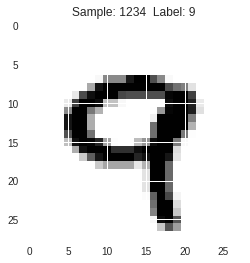

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(mnist.train.labels[num])  
    #Print the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

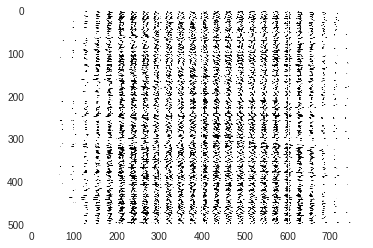

In [3]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])
for i in range(1, 500):
    images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

This is showing the first 500 training samples, one on each row. Imagine each pixel on each row getting fed into the bottom layer of a neural network 768 neurons (or "units") wide as we train our neural network.

So let's start setting up that artificial neural network. We'll start by creating "placeholders" for the input images and for the "correct" labels for each. Think of these as parameters - we build up our neural network model without knowledge of the actual data that will be fed into it; we just need to construct it in such a way that our data will fit in.

So our "input_images" placeholder will be set up to hold an array of values that consist of 784 floats (28x28), and our "target_labels" placeholder will be set up to hold an array of values that consist of 10 floats (one-hot format for 10 digits.)

While training, we'll assign input_images to the training images and target_labels to the training lables. While testing, we'll use the test images and test labels instead.

In [0]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

Sosetting up our deep neural network. We'll need an input layer with one node per input pixel per image, or 784 nodes. That will feed into a hidden layer of some arbitrary size - let's pick 512. That hidden layer will output 10 values, corresonding to scores for each classification to be fed into softmax.

In [0]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

Now setting up the neural network itself. We'll define the input layer and associate it with our placeholder for input data. All this layer does is multiply these inputs by our input_weight tensor which will be learned over time.
Then we'll feed that into our hidden layer, which applies the ReLU activation function to the weighted inputs with our learned biases added in as well.
Finally our output layer, called digit_weights, multiplies in the learned weights of the hidden layer and adds in the hidden layer's bias term.

In [0]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

Next I define the loss function for use in measuring progress in gradient descent: cross-entropy, which applies a logarithmic scale to penalize incorrect classifications much more than ones that are close.

In [0]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

Now setting up gradient descent optimizer, initializing it with a learning rate (0.1) and the loss function defined above.

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss_function)

Next to train our neural network and measure its accuracy.

In [0]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Setting up a Tensorflow session, and initializing the variables. 

In [64]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 100
Accuracy: 0.8655
Training epoch 200
Accuracy: 0.873
Training epoch 300
Accuracy: 0.9056
Training epoch 400
Accuracy: 0.9053
Training epoch 500
Accuracy: 0.9131
Training epoch 600
Accuracy: 0.9204
Training epoch 700
Accuracy: 0.9178
Training epoch 800
Accuracy: 0.9256
Training epoch 900
Accuracy: 0.9261
Training epoch 1000
Accuracy: 0.9273
Training epoch 1100
Accuracy: 0.935
Training epoch 1200
Accuracy: 0.9324
Training epoch 1300
Accuracy: 0.9251
Training epoch 1400
Accuracy: 0.9342
Training epoch 1500
Accuracy: 0.9355
Training epoch 1600
Accuracy: 0.9392
Training epoch 1700
Accuracy: 0.9385
Training epoch 1800
Accuracy: 0.9348
Training epoch 1900
Accuracy: 0.9401
Training epoch 2000
Accuracy: 0.9389


This model gives about 93% accuracy.

Looking at some of the misclassified images and see just how good or bad my model is, compared to what our own brain can do. I went through the first 100 test images and looked at the ones that are misclassified:

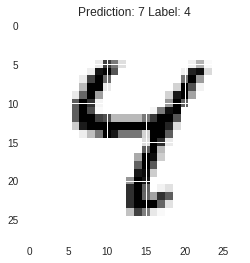

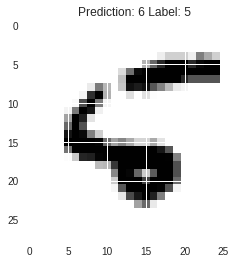

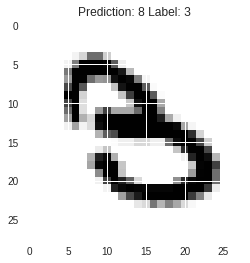

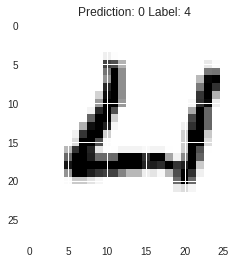

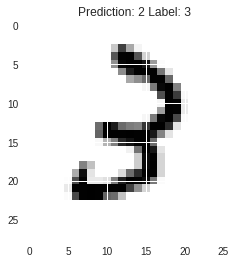

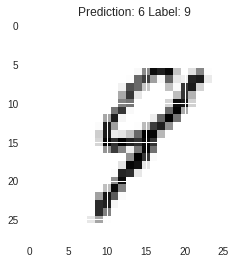

In [65]:
for x in range(100):
    # Load a single test image and its label
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    # Convert the one-hot label to an integer
    label = y_train.argmax()
    # Get the classification from our neural network's digit_weights final layer, and convert it to an integer
    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    # If the prediction does not match the correct label, display it
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()